# Simulations from model only implementing Bayes rule and Bayesian practical reasoner model

email any Qs to hunter @ priniski at u c l a dot e d u


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Motivated Decisions /BDT Model

/content/drive/MyDrive/Motivated Decisions /BDT Model


In [ ]:
cd ../

/content/drive/MyDrive


In [ ]:
import random
random.seed(420)

In [ ]:
import pandas as pd
import scipy

import numpy as np

from random import randrange
from random import choice

from scipy.stats import beta, bernoulli


%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style = 'white')

In [ ]:
#we say there is 6 max evidence right (plus 1 for python indexing)
MAX_EVIDENCE = 6 ; 

In [ ]:
###########################
#PRACTICAL REASONING MODEL#
###########################

#base = beta-bernoulli, expected value calculation = BDT model. 
POINTS_OTHER = 2; POINTS_BONUS = 3;
N = 4200; samples = 10; #how many trials to run, how many evidence reps to sample

#map evidence count to a certainty representation
#uniform
a = 1; b = 1;

#some lists for plotting, to check things check out
ev_worlds = []; 

base_creds = []; base_cred_avgs = []; #the avg will be used for the sampled representation outputs 
EV_Os = []; EV_Bs = []; EV_samp_Os = []; EV_samp_Bs = [];

base_outs = []; base_samp_outs = [];

#generate N samples, try varying utility, and see how motivation changes as a function of it. that's a good fig
for i in range(N):

  #sample a value which will serve as the world state, the true number of facts for bonus
  ev_world = np.random.choice(MAX_EVIDENCE + 1)
  ev_worlds.append(ev_world)

  base_cred = beta.rvs(a + ev_world, b + (MAX_EVIDENCE - ev_world), size = 1)[0]
  base_creds.append(base_cred)

  #averaged samples
  base_cred_avg = np.mean(beta.rvs(a + ev_world, b + (MAX_EVIDENCE - ev_world), size = samples))
  base_cred_avgs.append(base_cred_avg)

  #These EV variables are the second order beliefs (credences)
  EV_O = (1 - base_cred) * POINTS_OTHER;
  EV_B = base_cred * POINTS_BONUS;

  #will compare against a multiple samples implementation
  EV_samp_O = (1 - base_cred_avg) * POINTS_OTHER;
  EV_samp_B = base_cred_avg * POINTS_BONUS;

  EV_Os.append(EV_O); EV_Bs.append(EV_B);
  EV_samp_Os.append(EV_samp_O); EV_samp_Bs.append(EV_samp_B);

  #decision output
  base_out = np.argmax([EV_O, EV_B])
  base_outs.append(base_out)

  base_samp_out = np.argmax([EV_samp_O, EV_samp_B])
  base_samp_outs.append(base_samp_out)

In [ ]:
#make into a dataframe
prac_df = pd.DataFrame({'ev_world': ev_worlds,
                         'base_cred':base_creds,
                         'base_cred_avgs': base_cred_avgs,
                         'EV_O': EV_Os,
                         'EV_B': EV_Bs,
                         'EV_samp_O': EV_samp_Os,
                         'EV_samp_B': EV_samp_Bs,
                         'base_out':base_outs,
                         'base_samp_out':base_samp_outs})

print(prac_df['base_cred'].mean(), prac_df['base_cred'].var())
prac_df.head()

0.5054224193137001 0.08329598052726238


,ev_world,base_cred,base_cred_avgs,EV_O,EV_B,EV_samp_O,EV_samp_B,base_out,base_samp_out
0,4,0.795789,0.656558,0.408422,2.387367,0.686883,1.969675,1,1
1,1,0.436731,0.287993,1.126538,1.310193,1.424013,0.863980,1,0
2,2,0.166757,0.345560,1.666485,0.500272,1.308880,1.036679,0,0
3,6,0.999204,0.899633,0.001591,2.997613,0.200735,2.698898,1,1
4,1,0.289545,0.268013,1.420910,0.868635,1.463975,0.804038,0,0


In [ ]:
prac_df.groupby('ev_world')['base_out'].mean()

ev_world
0    0.040853
1    0.128664
2    0.457990
3    0.721582
4    0.906143
5    0.981818
6    1.000000
Name: base_out, dtype: float64

In [ ]:
##########################
#BAYESIAN REASONING MODEL#
##########################

#base = beta-bernoulli, expected value calculation = BDT model. 
POINTS_OTHER = 1; POINTS_BONUS = 1;
N = 4200; samples = 10; #how many trials to run, how many evidence reps to sample

#map evidence count to a certainty representation
#uniform
a = 1; b = 1;

#some lists for plotting, to check things check out
ev_worlds = []; 

base_creds = []; base_cred_avgs = []; #the avg will be used for the sampled representation outputs 
EV_Os = []; EV_Bs = []; EV_samp_Os = []; EV_samp_Bs = [];

base_outs = []; base_samp_outs = [];

#generate N samples, try varying utility, and see how motivation changes as a function of it. that's a good fig
for i in range(N):

  #sample a value which will serve as the world state, the true number of facts for bonus
  ev_world = np.random.choice(MAX_EVIDENCE + 1)
  ev_worlds.append(ev_world)

  base_cred = beta.rvs(a + ev_world, b + (MAX_EVIDENCE - ev_world), size = 1)[0]
  base_creds.append(base_cred)

  #averaged samples
  base_cred_avg = np.mean(beta.rvs(a + ev_world, b + (MAX_EVIDENCE - ev_world), size = samples))
  base_cred_avgs.append(base_cred_avg)

  #These EV variables are the second order beliefs (credences)
  EV_O = (1 - base_cred) * POINTS_OTHER;
  EV_B = base_cred * POINTS_BONUS;

  #will compare against a multiple samples implementation
  EV_samp_O = (1 - base_cred_avg) * POINTS_OTHER;
  EV_samp_B = base_cred_avg * POINTS_BONUS;

  EV_Os.append(EV_O); EV_Bs.append(EV_B);
  EV_samp_Os.append(EV_samp_O); EV_samp_Bs.append(EV_samp_B);

  #decision output
  base_out = np.argmax([EV_O, EV_B])
  base_outs.append(base_out)

  base_samp_out = np.argmax([EV_samp_O, EV_samp_B])
  base_samp_outs.append(base_samp_out)

In [ ]:
#make into a dataframe
bayes_df = pd.DataFrame({'ev_world': ev_worlds,
                         'base_cred':base_creds,
                         'base_cred_avgs': base_cred_avgs,
                         'EV_O': EV_Os,
                         'EV_B': EV_Bs,
                         'EV_samp_O': EV_samp_Os,
                         'EV_samp_B': EV_samp_Bs,
                         'base_out':base_outs,
                         'base_samp_out':base_samp_outs})

print(bayes_df['base_cred'].mean(), bayes_df['base_cred'].var())
bayes_df.head()

0.4968091579264406 0.0850378641184908


,ev_world,base_cred,base_cred_avgs,EV_O,EV_B,EV_samp_O,EV_samp_B,base_out,base_samp_out
0,2,0.285358,0.363114,0.714642,0.285358,0.636886,0.363114,0,0
1,0,0.040960,0.122669,0.959040,0.040960,0.877331,0.122669,0,0
2,2,0.782139,0.341097,0.217861,0.782139,0.658903,0.341097,1,0
3,2,0.749555,0.405603,0.250445,0.749555,0.594397,0.405603,1,0
4,2,0.175179,0.354982,0.824821,0.175179,0.645018,0.354982,0,0


In [ ]:
bayes_df.groupby('ev_world')['base_out'].mean()

ev_world
0    0.006633
1    0.063444
2    0.210702
3    0.523478
4    0.764605
5    0.937063
6    0.995066
Name: base_out, dtype: float64

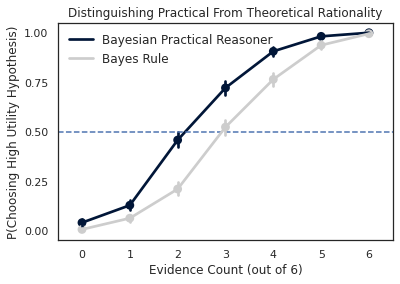

In [ ]:
#https://coolors.co/9cfffa-acf39d-b0c592-a97c73-af3e4d
ax = sns.pointplot(x="ev_world", y="base_out", data=prac_df, color = '#011638', label = 'prac')
ax.axhline(.5, ls='--')
ax = sns.pointplot(x="ev_world", y="base_out", data=bayes_df, color = '#CDCDCD', label = 'bayes')


#ax = sns.pointplot(x="ev_world", y="base_out", data=base_df_1_3, color = '#9933ff', label = 'base_df_1_3')
#ax = sns.pointplot(x="ev_world", y="base_out", data=base_df_1_1, color = 'black', label = 'base_df_1_1')
#decisions
#ax = sns.pointplot(x="ev_world", y="base_out", data=base_df, color = '#AF3E4D', label = 'BDT')
#ax = sns.pointplot(x="ev_world", y="MR_out", data=MR_df, color = '#ACF39D', label = 'MR')

plt.xlabel("Evidence Count (out of 6)")
plt.ylabel("P(Choosing High Utility Hypothesis)")

plt.yticks([0, .25, .50, .75, 1.0])


ax.set(title = 'Distinguishing Practical From Theoretical Rationality')
ax.legend([r'Bayesian Practical Reasoner', r'Bayes Rule'], loc = 'upper left', frameon = False, fontsize = 'medium')
leg = ax.get_legend()
leg.legendHandles[0].set_color('#011638')
leg.legendHandles[1].set_color('#CDCDCD')
#leg.legendHandles[2].set_color('#9933ff')
#leg.legendHandles[3].set_color('black')
plt.savefig('PvRDecisions.pdf')